In [1]:
from torchvision import datasets, transforms
from torch.utils.data import Subset, DataLoader
import torch
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  # For creating static plots
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [3]:
from torchvision.datasets import FashionMNIST
dataset = FashionMNIST(root='./data', train=True, download=True)

# train_df = pd.read_csv("mnist_fashion_train.csv")
# test_df = pd.read_csv( "mnist_fashion_test.csv")


100%|██████████| 26.4M/26.4M [00:01<00:00, 13.8MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 203kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 3.77MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 15.0MB/s]


In [ ]:
##EDA

In [4]:
class_to_idx = dataset.class_to_idx
print(class_to_idx)
idx_to_class = {v: k for k, v in class_to_idx.items()}

{'T-shirt/top': 0, 'Trouser': 1, 'Pullover': 2, 'Dress': 3, 'Coat': 4, 'Sandal': 5, 'Shirt': 6, 'Sneaker': 7, 'Bag': 8, 'Ankle boot': 9}


In [ ]:
train_df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,119,114,130,76,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,33,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
train_df.describe()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000
mean,4.500000,0.000800,0.005783,0.030083,0.103800,0.249683,0.414717,0.821667,2.224733,5.698667,...,34.564367,23.208633,16.576250,17.831967,22.918850,17.916900,8.485717,2.706333,0.819000,0.070883
std,2.872305,0.092554,0.249033,0.767868,2.512017,4.331376,5.827394,8.309935,14.201820,23.835980,...,57.557779,48.881430,42.044318,43.911297,51.928401,45.173634,29.448614,17.258682,9.133252,2.075829
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,57.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9.000000,16.000000,36.000000,119.000000,164.000000,224.000000,230.000000,221.000000,221.000000,254.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,170.000000


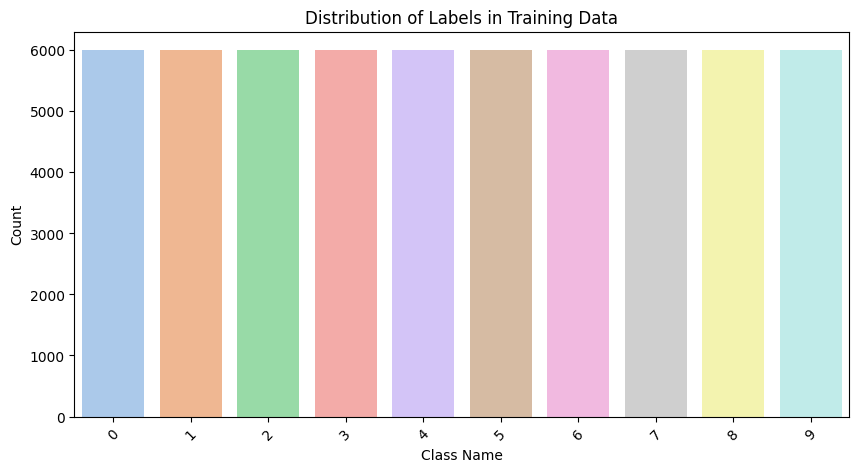

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(
    x=train_df['label'],  # Inline mapping from numeric labels to class names
    hue=train_df['label'],  # Set hue to the same as x to avoid the warning
    palette='pastel',
    legend=False
)
plt.title("Distribution of Labels in Training Data")
plt.xlabel("Class Name")
plt.ylabel("Count")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Display the plot
plt.show()

In [5]:
train_transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ToTensor(),
])

test_transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

In [6]:
train_dataset = FashionMNIST(root='./data', train=True, download=True,transform =train_transform)
test_dataset = FashionMNIST(root='./data', train=False, download=True,transform =train_transform)


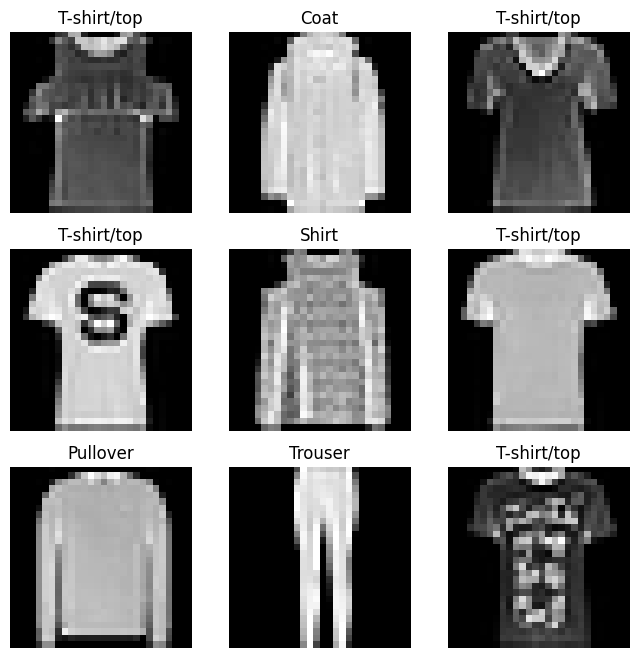

In [ ]:

figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_dataset), size=(1,)).item()
    img, label = train_dataset[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(idx_to_class[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [9]:
train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=64, shuffle=True)


Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


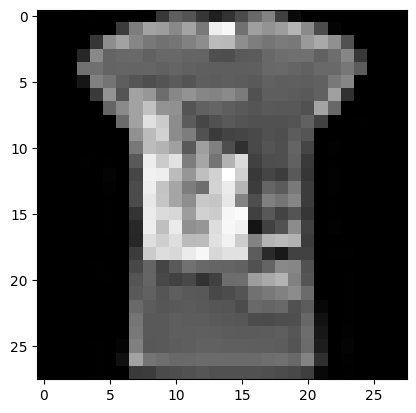

Label: 0


In [ ]:
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

Shape du batch: torch.Size([64, 1, 128, 128])


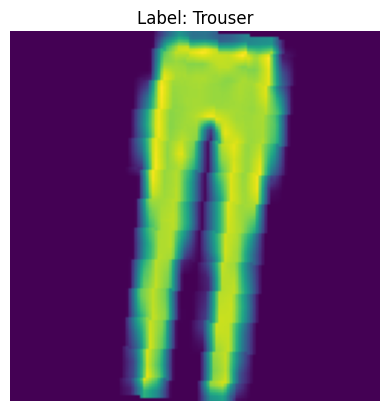

In [ ]:
import matplotlib.pyplot as plt
import torchvision

images, labels = next(iter(train_dataloader))
print(f"Shape du batch: {images.shape}")

img = images[0]
img = img.permute(1, 2, 0)

img = img * 0.5 + 0.5   # inverse de Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))

plt.imshow(img)
label=labels[0].item()
plt.title(f"Label: {idx_to_class[label]}")
plt.axis("off")
plt.show()


In [ ]:
###CNN

In [7]:
class CNN(nn.Module):

   def __init__(self,num_classes=10):
      super().__init__()
      self.conv1 = nn.Conv2d(in_channels=1, out_channels=3, kernel_size=3) #taille devient 3,126,126 après maxpool, 3,63,63
      self.conv2 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3)#16*61*61 puis 16*30*30
      self.conv3 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3)#32*28*28 puis 32*14*14
      self.maxpool = nn.MaxPool2d(2,2)
      self.dropout = nn.Dropout(p=0.3)
      self.Linear1= nn.Linear(32 * 14 * 14,128)
      self.Linear2= nn.Linear(128,num_classes)
      self.bn1 = nn.BatchNorm2d(3)
      self.bn2 = nn.BatchNorm2d(16)
      self.bn3 = nn.BatchNorm2d(32)


   def forward(self, x):
        x=self.maxpool(F.relu(self.bn1(self.conv1(x))))
        x=self.maxpool(F.relu(self.bn2(self.conv2(x))))
        x=self.maxpool(F.relu(self.bn3(self.conv3(x))))
        x = x.view(x.size(0), -1)
        x=F.relu(self.Linear1(x))
        x=self.dropout(x)
        y=self.Linear2(x)
        return y

In [10]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CNN().to(device)
optim = torch.optim.Adam(model.parameters(),lr=0.001)
criterion = nn.CrossEntropyLoss()
for epoch in range(5):
  model.train()
  running_loss = 0.0
  for image,label in train_dataloader:
    image, label = image.to(device), label.to(device)
    optim.zero_grad()
    outputs = model(image)
    loss=criterion(outputs,label)
    running_loss+=loss
    loss.backward()
    optim.step()

  print(f"Epoch {epoch+1}, Loss: {running_loss/len(train_dataloader):.4f}")

Epoch 1, Loss: 0.5423
Epoch 2, Loss: 0.3950
Epoch 3, Loss: 0.3552
Epoch 4, Loss: 0.3289
Epoch 5, Loss: 0.3084


In [11]:
from sklearn.metrics import classification_report


In [14]:
model.eval()
y_true, y_pred = [], []
with torch.no_grad():
  for image,label in test_dataloader:
    image, label = image.to(device), label.to(device)
    y_p = model(image)
    _, preds = torch.max(y_p, 1)
    y_pred.extend(preds.cpu().numpy())
    y_true.extend(label.cpu().numpy())

  print(classification_report(y_pred,y_true))

              precision    recall  f1-score   support

           0       0.85      0.84      0.85      1006
           1       0.96      1.00      0.98       969
           2       0.83      0.85      0.84       982
           3       0.90      0.90      0.90      1006
           4       0.84      0.83      0.84      1006
           5       0.97      0.98      0.98       998
           6       0.71      0.70      0.71      1017
           7       0.97      0.93      0.95      1039
           8       0.98      0.97      0.98      1008
           9       0.94      0.97      0.96       969

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [16]:
import torchvision.models as models

In [17]:
model = models.resnet18(pretrained=True)

/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


100%|██████████| 44.7M/44.7M [00:00<00:00, 185MB/s]


In [18]:
for param in model.parameters():
  param.requieres_grad=False

In [19]:
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 10)

In [22]:
transform = transforms.Compose([
    transforms.Resize(224),           # Redimensionner à 224x224
    transforms.Grayscale(num_output_channels=3),  # Convertir 1 canal → 3 canaux
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5,0.5,0.5], std=[0.5,0.5,0.5])
])

In [24]:
train_dataset = FashionMNIST(root='./data', train=True, download=True,transform =transform)
test_dataset = FashionMNIST(root='./data', train=False, download=True,transform =transform)

In [25]:
train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=64, shuffle=True)


In [26]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)
optim = torch.optim.Adam(model.parameters(),lr=0.001)
criterion = nn.CrossEntropyLoss()
for epoch in range(5):
  model.train()
  running_loss = 0.0
  for image,label in train_dataloader:
    image, label = image.to(device), label.to(device)
    optim.zero_grad()
    outputs = model(image)
    loss=criterion(outputs,label)
    running_loss+=loss
    loss.backward()
    optim.step()

  print(f"Epoch {epoch+1}, Loss: {running_loss/len(train_dataloader):.4f}")

Epoch 1, Loss: 0.3020
Epoch 2, Loss: 0.2041
Epoch 3, Loss: 0.1675
Epoch 4, Loss: 0.1448
Epoch 5, Loss: 0.1155


In [27]:
model.eval()
y_true, y_pred = [], []
with torch.no_grad():
  for image,label in test_dataloader:
    image, label = image.to(device), label.to(device)
    y_p = model(image)
    _, preds = torch.max(y_p, 1)
    y_pred.extend(preds.cpu().numpy())
    y_true.extend(label.cpu().numpy())

  print(classification_report(y_pred,y_true))

              precision    recall  f1-score   support

           0       0.94      0.83      0.88      1133
           1       0.98      1.00      0.99       983
           2       0.89      0.93      0.91       953
           3       0.95      0.91      0.93      1045
           4       0.92      0.91      0.91      1016
           5       0.99      0.99      0.99      1001
           6       0.76      0.87      0.81       872
           7       0.99      0.96      0.98      1025
           8       0.99      0.99      0.99       997
           9       0.96      0.99      0.97       975

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000

